In [56]:
import pandas as pd

df = pd.read_csv("../data/superstore_sales.csv")
df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Region,Category,Sub-Category,Sales,Profit,Quantity,Discount
0,CA-2018-1001,2018-01-05,2018-01-08,Second Class,CU-1001,Consumer,East,Technology,Phones,1200,300,2,0.1
1,CA-2018-1002,2018-01-07,2018-01-10,Standard Class,CU-1002,Corporate,West,Furniture,Chairs,450,50,3,0.0
2,CA-2018-1003,2018-02-10,2018-02-12,First Class,CU-1003,Home Office,Central,Office Supplies,Paper,80,20,5,0.0
3,CA-2018-1004,2018-02-15,2018-02-18,Second Class,CU-1004,Consumer,South,Technology,Accessories,230,60,2,0.1
4,CA-2018-1005,2018-03-01,2018-03-04,Standard Class,CU-1005,Corporate,East,Furniture,Tables,600,-40,1,0.2


In [57]:
df.shape


(24, 13)

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      24 non-null     object 
 1   Order Date    24 non-null     object 
 2   Ship Date     24 non-null     object 
 3   Ship Mode     24 non-null     object 
 4   Customer ID   24 non-null     object 
 5   Segment       24 non-null     object 
 6   Region        24 non-null     object 
 7   Category      24 non-null     object 
 8   Sub-Category  24 non-null     object 
 9   Sales         24 non-null     int64  
 10  Profit        24 non-null     int64  
 11  Quantity      24 non-null     int64  
 12  Discount      24 non-null     float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.6+ KB


In [59]:
# Convert dates
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check missing values
df.isnull().sum()


Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Region          0
Category        0
Sub-Category    0
Sales           0
Profit          0
Quantity        0
Discount        0
dtype: int64

In [60]:
# Create new features
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month


In [61]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
average_order_value = df["Sales"].mean()

total_sales, total_profit, average_order_value


(np.int64(18410), np.int64(3375), np.float64(767.0833333333334))

In [62]:
import matplotlib.pyplot as plt

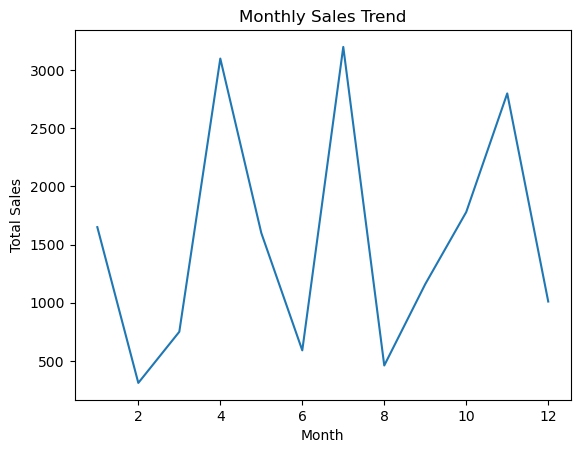

In [63]:
monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [64]:
import matplotlib.pyplot as plt


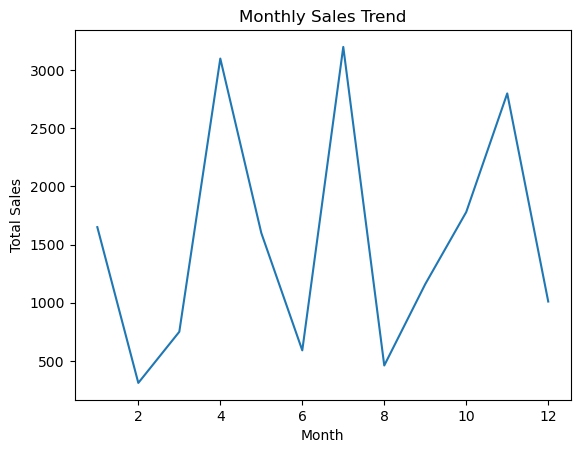

In [65]:
plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


category_sales = df.groupby("Category")["Sales"].sum()

plt.figure()
category_sales.plot(kind="bar")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


In [66]:
import matplotlib.pyplot as plt

In [67]:
category_sales = df.groupby("Category")["Sales"].sum()
category_sales


Category
Furniture           5400
Office Supplies     1180
Technology         11830
Name: Sales, dtype: int64

In [68]:
plt.figure()
category_sales.plot(kind="bar")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.savefig("../images/category_sales.png")  # saves the plot as an image
plt.close()
